In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets_data = pd.read_csv('https://raw.githubusercontent.com/rizkyfransisca/Visdat-Assignment-Text-Visualization-COVID-19-Tweets/master/covid19_tweets.csv')

## Data Cleaning

In [3]:
tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(tweets_data.shape[0], tweets_data.shape[1]))

There are 179108 observations and 13 features in this dataset. 



In [5]:
# Drop missing values
tweets_data = tweets_data.dropna()

In [6]:
def remove_text_with_appropriate_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, "", text)
    return text

In [7]:
tweets_data['text'] = np.vectorize(remove_text_with_appropriate_pattern)(tweets_data['text'], "@[\w]*")
tweets_data['text'] = np.vectorize(remove_text_with_appropriate_pattern)(tweets_data['text'], "#[\w]*")
tweets_data['text'] = np.vectorize(remove_text_with_appropriate_pattern)(tweets_data['text'], '[0-9]')
tweets_data['text'] = tweets_data['text'].apply(lambda text: ' '.join([i for i in text.split() if len(i) > 3]))
tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed hoax. claim that this...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,gift give appreciation simple things that were...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July Media Bulletin Novel https://t.co/MNEEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise. It's almost ever was. Po...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"Will Change Work General (and recruiting, spec...","['COVID19', 'Recruiting']",Buffer,False


## Visualization

In [8]:
tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed hoax. claim that this...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,gift give appreciation simple things that were...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July Media Bulletin Novel https://t.co/MNEEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise. It's almost ever was. Po...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"Will Change Work General (and recruiting, spec...","['COVID19', 'Recruiting']",Buffer,False


In [9]:
tweets_data[["user_location", "user_name", "text"]].head()

,user_location,user_name,text
2,"Pewee Valley, KY",Time4fisticuffs,Trump never once claimed hoax. claim that this...
3,Stuck in the Middle,ethel mertz,gift give appreciation simple things that were...
4,Jammu and Kashmir,DIPR-J&K,July Media Bulletin Novel https://t.co/MNEEcsJHh
5,Новоро́ссия,🎹 Franz Schubert,deaths continue rise. It's almost ever was. Po...
6,"Gainesville, FL",hr bartender,"Will Change Work General (and recruiting, spec..."


In [10]:
# Group by user verified and Find summary statistic of the grouped data
user_verified_group = tweets_data.groupby("user_verified")
user_verified_group.describe().head()

user_followers                                              \
                       count           mean           std   min      25%   
user_verified                                                              
False                83223.0    6469.821179  4.696116e+04   0.0    236.0   
True                 15915.0  932220.808357  2.378994e+06  97.0  14300.0   

                                             user_friends               ...  \
                   50%       75%         max        count         mean  ...   
user_verified                                                           ...   
False           1006.0    3552.0   7379859.0      83223.0  2374.162095  ...   
True           57320.0  497638.5  24359165.0      15915.0  2374.549796  ...   

                                user_favourites                              \
                  75%       max           count          mean           std   
user_verified                                                                 
False          2015.0  445635.0         83223.0  16669.829110  47473.157505   
True           1542.5  497363.0         15915.0   7360.912033  26536.732344   

                                                       
               min    25%     50%      75%        max  
user_verified                                          
False          0.0  341.0  2383.0  11834.0  2047197.0  
True           0.0  282.0  1460.0   5481.0   580380.0  

[2 rows x 24 columns]

In [11]:
# Group by user location and Find summary statistic of the grouped data
user_location_group = tweets_data.groupby("user_location")
user_location_group.describe().head()

user_followers                                      \
                             count          mean          std      min   
user_location                                                            
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤                 4.0     50.500000     0.577350     50.0   
                              21.0   1988.714286  1896.399751    670.0   
     Cathlamet, Wa.            1.0    665.000000          NaN    665.0   
   Canada 🇨🇦🍁🛶🌲                1.0    950.000000          NaN    950.0   
   WorldWide                   1.0  18977.000000          NaN  18977.0   

                                                        user_friends  \
                         25%      50%      75%      max        count   
user_location                                                          
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤          50.0     50.5     51.0     51.0          4.0   
                      1058.0   1892.0   1893.0   9998.0         21.0   
     Cathlamet, Wa.    665.0    665.0    665.0    665.0          1.0   
   Canada 🇨🇦🍁🛶🌲        950.0    950.0    950.0    950.0          1.0   
   WorldWide         18977.0  18977.0  18977.0  18977.0          1.0   

                                  ...                 user_favourites  \
                            mean  ...     75%     max           count   
user_location                     ...                                   
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤         41.000000  ...    41.0    41.0             4.0   
                     1901.714286  ...  1660.0  9223.0            21.0   
     Cathlamet, Wa.   591.000000  ...   591.0   591.0             1.0   
   Canada 🇨🇦🍁🛶🌲      2819.000000  ...  2819.0  2819.0             1.0   
   WorldWide         1298.000000  ...  1298.0  1298.0             1.0   

                                                                           \
                             mean          std      min      25%      50%   
user_location                                                               
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤         136.500000     5.196152    132.0    132.0    136.5   
                      5432.666667  7907.494093    133.0   2714.0   2737.0   
     Cathlamet, Wa.   8043.000000          NaN   8043.0   8043.0   8043.0   
   Canada 🇨🇦🍁🛶🌲      28291.000000          NaN  28291.0  28291.0  28291.0   
   WorldWide         25240.000000          NaN  25240.0  25240.0  25240.0   

                                       
                         75%      max  
user_location                          
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤         141.0    141.0  
                      2772.0  24401.0  
     Cathlamet, Wa.   8043.0   8043.0  
   Canada 🇨🇦🍁🛶🌲      28291.0  28291.0  
   WorldWide         25240.0  25240.0  

[5 rows x 24 columns]

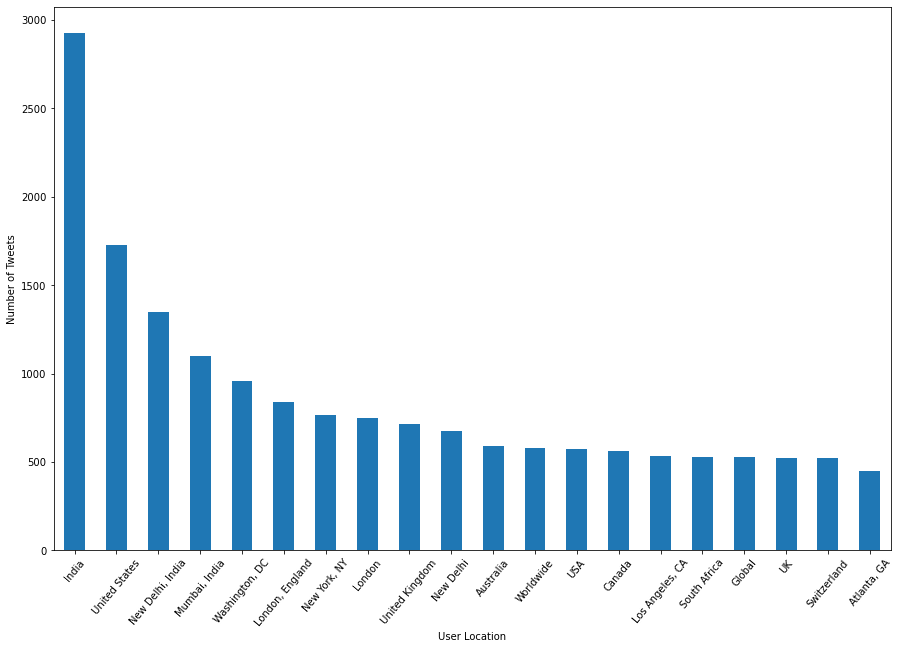

In [32]:
plt.figure(figsize=(15,10))
user_location_group.size().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("User Location")
plt.ylabel("Number of Tweets")
plt.show()

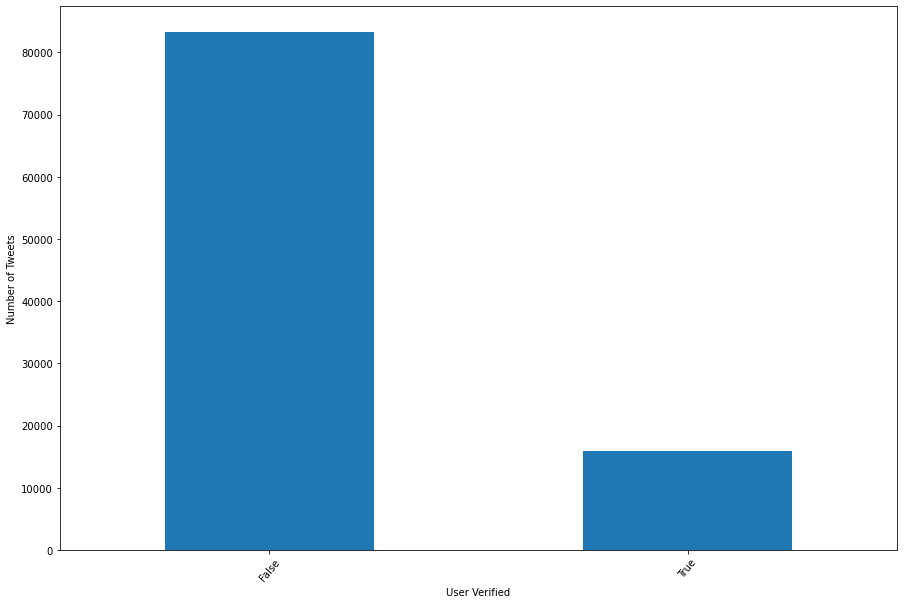

In [31]:
plt.figure(figsize=(15,10))
user_verified_group.size().sort_values(ascending=False).head(20).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("User Verified")
plt.ylabel("Number of Tweets")
plt.show()

Trump never once claimed hoax. claim that this effort https://t.co/JkkvHWHb


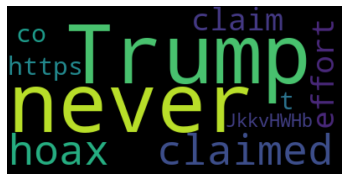

In [14]:
# Reset the index of the dataframe
tweets_data = tweets_data.reset_index(drop=True)
tweets_data

# Start with one review:
text = tweets_data["text"][0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

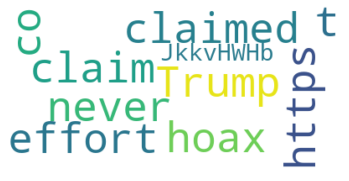

In [15]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
text = " ".join(review for review in tweets_data["text"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 8080950 words in the combination of all review.


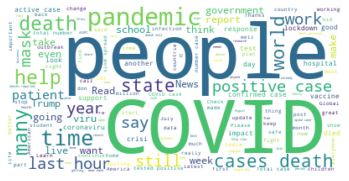

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "never", "new", "CO","today", "t", "Thank","S","amp","will","know","need"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Creating wordcloud follow the shape of the image

In [18]:
corona_mask = np.array(Image.open("corona.png"))
corona_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [20]:
# Transform your mask into a new one that will work with the function:
transformed_corona_mask = np.ndarray((corona_mask.shape[0],corona_mask.shape[1]), np.int32)

for i in range(len(corona_mask)):
    transformed_corona_mask[i] = list(map(transform_format, corona_mask[i]))

In [21]:
# Check the expected result of your mask
transformed_corona_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [22]:
transformed_corona_mask.shape

(1598, 1676)

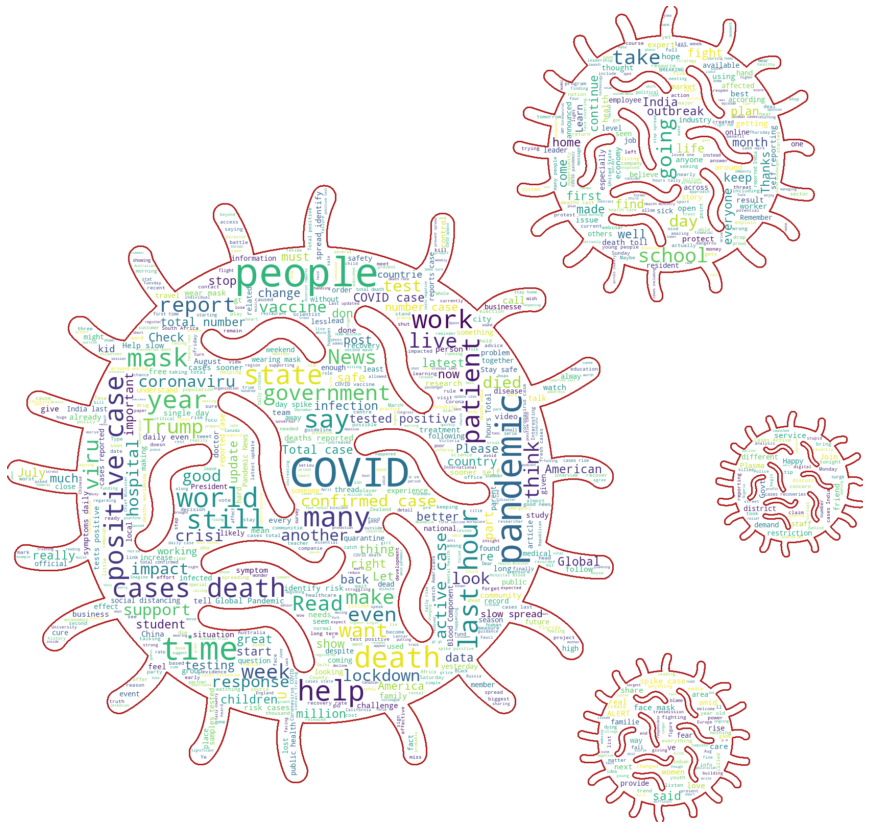

In [23]:
# Create a word cloud image
word_cloud = WordCloud(background_color="white", max_words=1000, mask=transformed_corona_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
word_cloud.generate(text)

# store to file
word_cloud.to_file("corona_virus_word_cloud.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Creating wordcloud following the color pattern

In [24]:
USA = " ".join(text for text in tweets_data[tweets_data["user_location"].str.match(".*USA$",na=False)].text)
india = " ".join(text for text in tweets_data[tweets_data["user_location"].str.match(".*India$",na=False)].text)
south_africa = " ".join(text for text in tweets_data[tweets_data["user_location"].str.match(".*South Africa$",na=False)].text)
canada = " ".join(text for text in tweets_data[tweets_data["user_location"].str.match(".*Canada$",na=False)].text)

#### USA

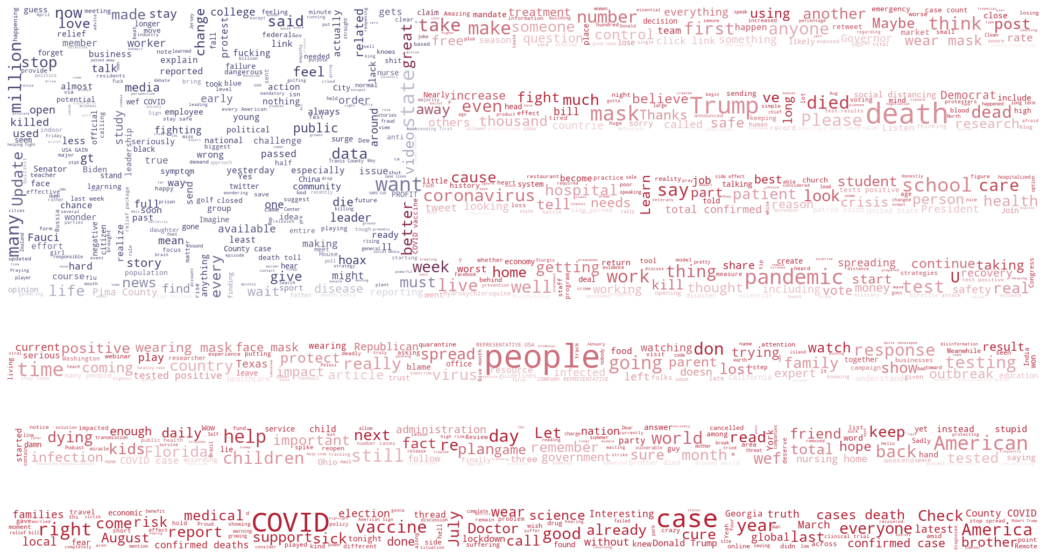

In [25]:
# Generate a word cloud image
mask = np.array(Image.open("usa.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(USA)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("usa_tweets.png", format="png")

plt.show()

#### India

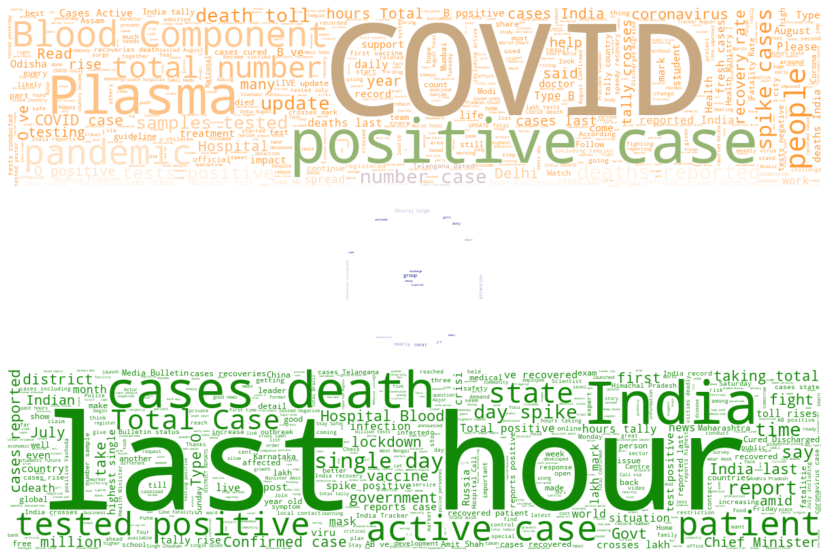

In [26]:
# Generate a word cloud image
mask = np.array(Image.open("india.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(india)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("india_tweets.png", format="png")

plt.show()

#### South Africa

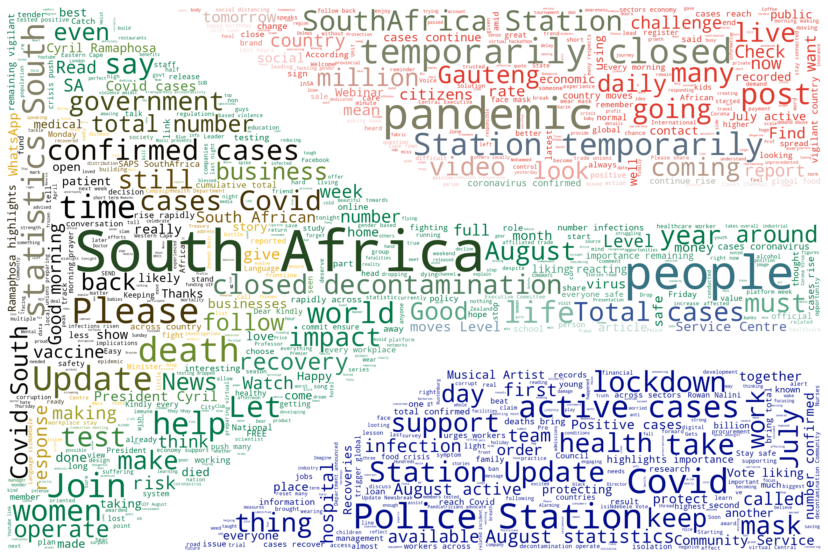

In [27]:
# Generate a word cloud image
mask = np.array(Image.open("south africa.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(south_africa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("south_africa_tweets.png", format="png")

plt.show()

#### Canada

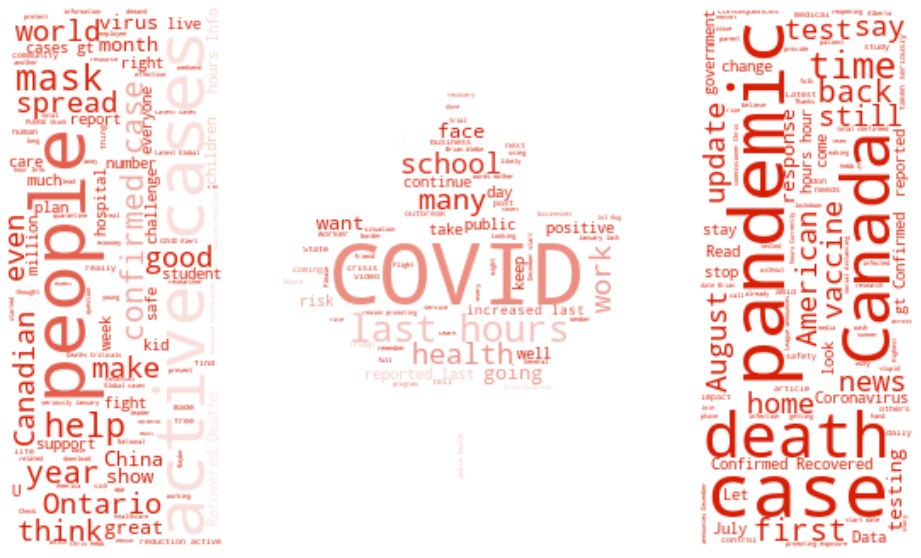

In [28]:
# Generate a word cloud image
mask = np.array(Image.open("canada.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(canada)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("canada_tweets.png", format="png")

plt.show()